Published on November 11, 2025. By Prata, Marília (mpwolke)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-tunix-hackathon/Hackathon dataset.txt
/kaggle/input/grade-school-math-8k-q-a/main_test.csv
/kaggle/input/grade-school-math-8k-q-a/main_train.csv
/kaggle/input/grade-school-math-8k-q-a/socratic_train.csv
/kaggle/input/grade-school-math-8k-q-a/socratic_test.csv
/kaggle/input/gemma/flax/2b-it/2/tokenizer.model
/kaggle/input/gemma/flax/2b-it/2/2b-it/manifest.0000000000000002
/kaggle/input/gemma/flax/2b-it/2/2b-it/_METADATA
/kaggle/input/gemma/flax/2b-it/2/2b-it/manifest.ocdbt
/kaggle/input/gemma/flax/2b-it/2/2b-it/checkpoint
/kaggle/input/gemma/flax/2b-it/2/2b-it/manifest.0000000000000001
/kaggle/input/gemma/flax/2b-it/2/2b-it/ocdbt.process_0/manifest.0000000000000002
/kaggle/input/gemma/flax/2b-it/2/2b-it/ocdbt.process_0/manifest.0000000000000003
/kaggle/input/gemma/flax/2b-it/2/2b-it/ocdbt.process_0/manifest.ocdbt
/kaggle/input/gemma/flax/2b-it/2/2b-it/ocdbt.process_0/manifest.0000000000000001
/kaggle/input/gemma/flax/2b-it/2/2b-it/ocdbt.process_0/d/d5f1ece99269e01ac


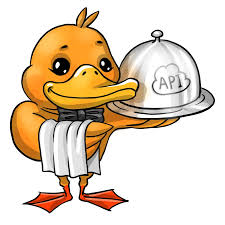

In [4]:
#codes from Rodrigo Lima  @rodrigolima82
from IPython.display import Image
Image(url = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTERQTExIVFhUVGBYYGBYXFxYYGBodGB0YGBgYHRgfHikgHRolHR8aITEhJSorLi4uHR8zOzMtNyktLisBCgoKDg0OGhAQGy0lICYuLTAyLS8tLis1LS0vLS0tLS8tLS0tLS0tLS0tLS0tLy0tLSstLS0tLS0tLS0tLS0tLf/AABEIAOEA4QMBEQACEQEDEQH/xAAbAAEAAgMBAQAAAAAAAAAAAAAABQYDBAcCAf/EAEoQAAIBAwIDBQQHBAUKBgMAAAECAwAEERIhBTFBBhMiUWEycYGRBxRCUmKhsSMzcpIkQ4LB8BUWNFNjk6KywuFkc6PR0/Elg4T/xAAaAQEAAwEBAQAAAAAAAAAAAAAAAwQFAgEG/8QAOBEAAgECBAIHCAEDBAMAAAAAAAECAxEEEiExQVEFE2FxkbHRFCIygaHB4fDxI0KCFVJikjNTsv/aAAwDAQACEQMRAD8A7jQCgFAKAUAoBQCgFAKAxzXCJp1Mq6iFXJA1E8lGeZ9KAyUAoBQCgFAKAUAoBQCgFAKAUAoBQCgFAKAUAoBQCgFAKAUAoBQGnxfiUdtC88pwiDJxuTnZVUdWYkKB1JAo3YbnH+MzzTXtlLP+9e7tMRg5WFe9DmNPcFyzfaIzyCgZWHxbxGI0+FXt6s0K2HVGjru7fwdE4720ihdoYVM8ye2qnTHH5CSXBCn8Khn5eHG9Xa+Jp0Veb+XEq0qE6r91GTsLxua8hlmlEYXvnSIoGAKoFVjkk5xIJFztnTnAqWnNzgpNWvwOJxUZNJ3LJXZwKAUAoBQCgFAKAUAoBQCgFAKAUAoBQCgFAKAUAoBQCgPJkGcZGffQFI+kCUvdcPhyO6zPcOPMwKgj+TSaveoql0hNxoO3HQs4SOaquwonFJJZ76MRP3QiDSSSj2ow6tEgT/alS+D09roKzsLJUIOpxei+5crp1ZKHDdmxYcPa6lFhZjRHH++lG4hU8yW+1O2+BzzljyNdYXCSrT62rr9/wK+IjTh1dP8Aj8nYuF8Pjt4Y4Il0xxKEVfIAYG/U+ZPOtwyjaoBQCgFAKAUAoBQCgFAKAUAoBQCgFAKAUAoBQCgPE8yopd2CqoJZmIAAG5JJ2AHnQFFvu3M05K8OhVk5G7n1LEeWe6jGGl6+LKrkczVLE4+lQ0er5Is0cLOrqtFzIefhk8291fXMueaI/wBXi92iLBI/iY1jVel60vgSX1/fA0afR9JfFqah7I2OP9Fi+K5PzO5qm8fif97LSwtH/aj1a9mLaNtcUfdthh4S2nxadXgzpydK7gDlXrxtaccs3dBYalF5oqzMQ7KN3UqLcsrylmaVVGrJ2GBnYBQq887c81OsZ7yeXRcCB4fRq+r4m/wHi9zwyJYfqUMtuu5e2LJMfN2jkJDuep1j8gK2KPSdGej90z6mBqR1Wp0Hs/x6C8i723k1LkqwIIdGHNHQ7qw8j7+VaSd9UUiToBQCgFAKAUBX73tlaRuyapJCh0uYIJp1Q9VZ40ZQw6rnI8qAluGcRiuIllhkWSNuTKcjbYj0IOxB3BoDaoBQCgFAKAUAoBQCgFAKAUB4mlVFLMwVVBLMTgADcknoAKA5pc3TcWYSOCvD1OYYWBBuCDtNKDv3Wd0jPPZj0FZOOx2X+nTevF8vyXsNh7+/PYmu6AHKsJo0lIwyLUMkSxZrPXBMj4hr1BozhqkRG0eXNeNnqRWOJJLZzi9s9pNhLFySdRuUYfexnS3Q+hrU6Oxzg+rnt5FLG4RSWeO51jgnFYrq3juIW1RyqGU/qD5EHII8wa+kMQ3qAUAoBQGnxi1aW3miSQxPJHIiyDmhZSA43G4JzzHKgOUydq5+GW7WbWqN9XhVj3EsbQ6WLqpywDgllY40k9etAXD6ObFoI5jNPA8txMZikLhkTKomM82YhQWOBkmgLlQCgFAKAUAoBQCgFAKAUAoCg9ur03VwvDkJ7pQst4Qeak5it/TWRqbl4R+KqWOxXUU9N3t6lnDUeslrsjdjUAYAwByAr5s1WfWNGeoh+N8Xht0MkzhFHU/oANya4hSnVllgrskc4045pMi+BdoIrxWaIOApx41K59R5ivMThZ0GlO3yJKFeNVXiSgqtcnsetddZjzKeZCSCBscHB9a9T1PGtCpt2cuFnab6xOVOS0ZcNHjngA8h5da0vaabp5Mi77alHqZKebM+4tP0V3vdT3NmT4X/AKTCN9skJOo8gG0NgffNbmBq56VnutPQysVTyVNOJ0urpWFAanFOJQ28TTTyLHGvN3OB6D1J6AbmgKLe9sru5JFnELeLpPOpaVvxJBkBR1Bc5/CKAxQdj2ujm7nnueumWQiIevdJpjHu0mgNm07C2cFtLbIhcT/vnOAzbYAGkAKBk40gUB4k7K2sp7ua2iJ5KxUHPluc4PrQGNuDXlpvZ3ciqP6mXM0Xu0udaj+Bh7qAkOD9vwGWLiEQtnY6VmDarZz5CQgGMnfwuBy5mgLxQCgFAKAUAoBQCgFAYby5WKN5HOFjVnY+QUEk/IUBzDstqMRuJP3t0xuJOexk3VN+iJpXHpXyePrupiHyWngb2FpZKS5vUnxLVZTJXAwXF0ADviuZT5HcYcWV6/lhkYFgxxyOBj37/Gu4KpFOzPZZHubtkseMp8fOoajl/cSwy8DZqM6FAZohUkURyZ9nmRR4iBn/AByqVRb2InJLcqrXYtrq3ugfDBL4zv8AuZB3chPooIfH4K1+j6uWplfHzKGMhmp3XA7UDW8ZJoce4xFaQPPMSFXGwGWZjsqKvVmOwFAc7t7aa+kF3d8wcwwZzHAOmOjzEc3+AwBXOY9sW3hXCQTnG1dHhNkADSvIc/WgBtts0Bq3Frkeo5UB7hTWMH2h+dAaV5wOKdHjkQHUN8jIPmCKAq/CL6ThM6Ws7M1jIwSKRiWNsx2SNm5mE8gx9nYE43oDpFAKAUAoBQCgFAKArn0ht/8Ajp03/a93Bt5TyJCfyc1HVnkhKXJNndOOaajzZX1GBXw+p9PYM9LnqRVe2/GxbRFjvjGlfvMc4HuGCavYHDutO37Yr4qsqULnPe017xa0eP6yDB3qiRF0x40np1II6q24619HHA0ErZTFeLqt7k/2B7XNNIIpcCTzGwcddujDnWT0jgVTjnht5GhgsW5yyy3Oj5rCNY+k0SbPLmSNq7TOGip8Z+t3NyLWyKCd1kctIcBUjIXbY+IkgDY9feN3o/DRqq8tkZOMrOm7R3KPwHtPKZmtbzxaiY8kKCreyUbGxBO3/arWKwSjHPS0aIcPiW5ZJ7M7l9F3GC9u1pIxMtrhQTzeI57l/XYFD6r61ew9ZVaakv1lWtSdObiQPaniJvb3SD+wtWZV/HKMrJJ7l3jX17w9RSpO2h5CN9S08Ng1aUHJQBSLEkWF2CLpFTEZ9hSgNmgMEq0Bpd6qyAahnyyM/KgN2RdwRQEd2k4THdW7o6hgVII8x1FARH0d8UcxyWc7FprQqoduckTA9zIfNsAq3quetAW+gFAKAUAoBQHxmABJOANyTyFAcsu+MTcWkYIzRcOjcadOVluWRgQ+vmkWoAjThjjfGdszH4xU11cVd+RcwuHcnmexMmAAADkBivnZK+psRlY1JBvVeRZicv8ApJ4ppeDVGVkikV9DDKSBcnKuNivIEHBGeVfRdEU8t5Rd0/FdjRjdIzvZNWf7sQf0j9tX4tdI4jKRoNEUXtNlsaiSBuzHGw6AepO2ZZt9jOzVxb8V7udNDwJrdcq2NaeAEqSMnUDj0rN6VqKOHa52Rf6NpuVdPkdIkknnnFnaYEzLqklYZS3jO2sj7Tn7KdTudqx8BglWeae3Ln+FxfyNPHYvqllhv5fksDdkeFw4SWEXUx2Mlw3eOxAyfaOB54UYFaNXGUsLeMU5Nb20S8Py+bMmNKdbWTt36sieMcEhiUy2jCzKeIhpGa2IHR42OEH4k0kc96zanSMcRJRlS8N/lp/Jcp0Z0VdT8dik8da61i8s2aK7twRJEuHJSQZEkZ5SRncjb5Fa0MDWjQeST92Wz215PkyLEwdZZ47rddnNFG4TYLMrOJJHve+TRAEJ1Kcs8ryclAOB/wDeRr1ZwhBubsihThKU0oq7Ok3V/PZsLuPT38CuGAzodH9tT1IHhcZ6py3xWLgK6jUyr4WamNoNwu90S3D4hFGigk7DfmT6k9SeefM1bc3e7KyjZHQ+EEJHq6nl/j/HKp4TIZRPdvda357L+tWou5BJWJi2ro5PlxMQQi7sd9+QHmaAwT2r4/esc+1yG3XGBsaA1p+HxlcaF+W/z50Bk4XPs0bNkocDJ3IwCPfjlQG9C3SgKNxUfVOLWk42SZmtZPdN4ovlKqj+2aAv9AKAUAoBQCgKj9Ktyy8MlRThrhorfPpM6o//AAFq4qSyxcuR1GOaSRB8F0xwhVAAGwA5ADAA+Qr5KtNuV2fQUqeljYa5NQORYVNGAvk1FIkUbI1eJ8NiuIzHNGHU9D0PmDzB9RXVGtOjLNB2ZxUpRqRyyRSZPost9eRPKF+7hdX82P7q1103Uy6xV/3h+TP/ANLhf4nYnZ5IrJdKB5Z5mOlSxead/NmOTgdWOwFVb1cZPNUei3fBL98S23SwkMsFq+HFst3YmyNpbNr8V1Oxknk6ZOwVfwquAB8atS6SpwpuNFa7J8l68e8zHQnOd5vt+ZibgMZvPrjlnkVNEYYjTGN9RUfebJyTWc8RLqeqW17vt7ybq1nzmbiMCSI0bqGRwVZT1B2IqopyhJSjuiyoKSsys3PZoJDELVysttnumcltSsSWhc9YzyH3cAjlvchjs05dcrxlulwfNdvmcezuCTp7r9s+wxcM40kjmKRTBcDdoXwG96tykXn4h+Ve1sNKKzxeaHBr78i3QxMJvK1aXL05kX2qlAhuT0KOo9SV0AfEkCrGDi3OC7fyQYySUJdxJ28ixxIZWChFRSWO2cAY9ST061qtOUtDNTUY6k5xPtbBGihu/iXAVXmt7iJDnbOt0AHxxUypVFwInUg+JMcBlBQMCCG3BByCOmD1FT02QzRbrL2AfPerBCatpL/SZlPtYjI/hwRt/az8xQGSx4lHNqC5BXOxGMjJXUPNcgj4UBEPxZtiUAV3MYOrcNkqNS45Z8jQDg+mR5Y5QpdSOQA2YbEdeYYbnpQDgnF0L9yz/tA7BQc5YKSMgnZtvKgIb6WlItXkX2ogsyn8ULLIP+WgL1DIGVWHJgCPcdxQHugFAKAUAoCmfStFmyjfpFc27H3M3dZ+BcH4VDiU3SklyJaLtUj3la4XN4SPI/rXyFbc+lorQ2maoblhIjJ2kluVtY5DENAkllABZULFVVAQRqYht8HAU7ZIqzSjThDramutkuHa3xsuXEpYqrLN1cOV36LvMx4PaFylrxO6aZCQ/wC170AjnkOGQHP2Rgj0q1iqlOnBNRTvzhl05pqz8yjRdRyazNfO5n/yJMRg30vvWO3B/OM1ne001tSXi/UtWqf734L0NnhPAoYGLqC0jbNLIxeQjy1HkPwjA9K5q4upVWV6LktEeRpqLvx5smlauEzxo+O+1HI9USOupQNycCuEnJ6FhWSIe742qnCgk/wsx+CqCas08LKWr9PMjniIrQjbrh7XY8VrJIM83CQFfUd60bD3rvV6hF0npUjH/Jfm5Sqzz7xb+TMCdhLl5E13aRQowYIxNy+R7PJFG3PxO24Bq9DF4Oldykm/+Kf8eRBKGInok7drLtwfhNrakSIkk845T3BDFc89Cjwxjp4QpI5k1DV6bpxVqENeb/bv6HscFOTvUkSb8WkYENpZTkFSoKkdQfSqK6Yxaldtd1v1/UsexUbW+5Ruy96I5byODAgjuXEafZTIVnRfIBy23rX0ca+eMZ2tdXM/q7XXJnV7G5BhVhyC8vcNxVmErkElYiuyOHtlvH3lnUyMx5qG3EY8lUYXHpUhyaNkZo44LkqgjUeLBJYpIcsSMY2zq+FAehZr9bm1Fj3bLIi58A7wHxY6tkHf1oCKtOJaOM92Fch4RqYIxRSGBXU2MDIL9fLzoDa43KJeJwQR7mBhNKw5INLd2mfvsTnH3QT1GQM/0oRZs5R96KZfmhoCY7FXYl4dZvkEtbwE4OcNoXUPeDkUBNUAoBQCgFAafGOHJcQSwSexKjIccxqGMj1HMUBx63eSCR45hiWI6JAOR6h1/Cwww9+OYNfL43DZJuPDdH0ODr54p+JMxvkAg5BrMa4Gno0Rc83dX6sSQs8IjDDo0ZdiM+ZV9QHXQatxj1mGst4yv8nb0+pmYm8a13xVvD+T5wbgdxYoph0zjAEkeQrH/axMTgMeqE4bGcg8/a+JpYqTU/d5P7Ps5PgV6dKdJXjrzXoTVj2it5G0a+7l6wzDu5B/Zb2veuR61TqYOrBZrXXNar6fcmjXhLTZ8noS1VSU+6q9uLHw0bPUeCgPMUuLn1mCjJIAHUnAok5PQ8bS3Ih+0sBOmEtcP92Ad5j+Jx4F/tMKtLBVbXn7q/5afTd+BC68do69x5CXs3tMtqn3U0zTfF2HdofQB/fXubDUtk5vt0Xhu/oeWqy3936v08zHJ2Ztj+/aSY/7eZ2H+7yE+S10sbWX/jSj3Jee/wBR1EP7rvvZocZ4PbQQS3NriCWCNnDQsFDaQSEdPZZSdtx12qfD4mtVqRpVveUnbXzT3RHUpQhFyho0ZOz3DRBAkeSzbs7HmzMcsx+Jrccs0tCoo2jY6dwKPEQz9ok/A7VbpFaZGWdvLZ64u6aa1dnZdGC8eslnQqSNSZJIxuMkYIxVkiJFOKwlAgjlIAxo7iTGBtjBXGKA0b28bUWjtJCxAGW7tMgchktnHwoCuTw3sswDSR2qkb91+1lx6O6hFO3PS1AWKLg0Vs8ccK6VO7EkszsxOp3c7s56sd6A0vpTl02Uh8opj/wHH50Bzzs7ad3HF3MrQXSRRa3iOknwjTrjI0SrtjLAjY4II2A6Z2N7VG5LW86hLqNdRC+xKmcd7HnfGcAqd1JHPINAWqgFAKAUBCdou1VtZ6VlcmR/YhjVpJX58kXfGx8RwPWuZTjFXk7I6jFydkjnfa7ir3ZWaPhtxHIgwJC9tl0znu3j7zONyQc5Uk8wWDZmIxWErRyuWvB2foXqFDEUpZlHyIjh3FtygDKy7tHIpVhnrg9PUZFZFXD6Xe3NamvSr8FvyZucQaO4iMcisu4Ksp8SMu6up6EGoqOajPNHw5rkK+WrHLI+cB7SNGwt7oYf7Eg2SQea+Teac/LIrrE4NTXW0duK4r8dpThVcHkn48yzyxwzppdUkX7rKGH8pFZsZVKTvFtPsLDUZrXU0P8ANq1HsxmP/wAqSWIfJGAqf26vxd+9J+aZx7PDgvBtHwcCQezPdj/+mZvyZjXvtcnvGP8A1Q9mXN+LMcnCx1urkf8A7sf3V0sS/wD1x/6nvs6/3PxNU8Lh63d2fQXU3/Sa79oqcIR/6o5dGC/ufiz43DrEbm3EpH2p2aX85Cxr3r8S9FK3YtPKxE4Ulwv36+Zgbtgme7tkMpXbTAmpV97nEY+dTQ6Lqz96ena3+s5eJitI/Q104zeTKXS2yAXXDzqhyhKsulVYZyCNzVqPRUI7y+hH7TJ7L6kZwrjU9wxRRbRSDnFK8wlH9gxrn4Gp30bTitZN9yRGsRKT0SJODg0ryqZ5DLpORGFCRZG4OnJLEdNRPuqWnThTXuL58T13fxMs9raOzAaTzHMYFSwp3ZxOR0W0h0qq+QA+VXoRsinJ3M1SHIoDSvRv8KAgLlf2y/D++gN3jfFYY5kDMCw30L4nPkAg3NAVztDavdjVdDurcf1ZbxuT7IbB2GeSAkk491AQi8Kmac3BjZI1jMcSEeNgSrM7L9n2VCqdwM5wTgAYmZkveHvH+9+sogx1jcETg/h7sFveq0B2KgFAKArvbvtH9RtS6KGmkYRQIc4MjZwWx9hQCx9BjIzXM5qEXJ7I6jFyaSKR2a4ToDSyOZZ5jqlmb2nPT3KBsFGwGK+TxeJliKmuy2Rv0KMaMLLfmTrRCqziSqZCcasFYByBqjzg9QDs2/8AjlXtKbi8vBnc0pJPiiqXfEmjJ1KqjoXJCH170Ahfcyj41owoxmtHfu38NPo2UpVXF6rx9fVHm6n7xCr2jyI33GhdT6gl1PxxXsIZJXjOz7U19hKWdWlG6+T+5D8O4vdxs6eF1RiNErYkUc1Gtc52xzz760JYCjXipxdm+K28P4M/2idOTi/qTEfa048UNwP4Cjj8nB/KqcuiJ8GmTxx0eKZgk7aRFgvd3LMeQ0DPr7Tii6Jqriv35HTx0O0x3XaooyqLSXUwyoZkUEDnuCRUi6Jnxkjh45cEaNz2ouT7ItYfR5Q7/kcflViHRVNfE2/oQyxk3sjVuL1ihlm03AXfDTnRt5RrGEJ9+amWCyq0Go9y18W7nPtC/uV+9/Ys9nP9UlaZYy0EwQuqDxREAAOFHtJjGQNxjIzVOhWUl1c3qtnzLVWk4vPFaP6Er38Tkz2sy6nxqx4o5MbeJcjD421DB5ZyBirWvwyINN4nm7tEuBpu7QNtswIcLnyYYkHwUV2vd+Fnj97dH1ezksXjgvp4twQJdMyDlthxkD0zXSknujlxa2ZvQXvFUYbWUy7YP7aJz8tS1LCMSKUmWH/Orig58Ngb+G7x+sdTER8HbLiWcf5KjHqb1f8A4qAlrXi9843t7eP3yu/6KKA8389yBmSaCMY5hCR82agIB7N53GbieVepTEMWP41A1eXhJ50BMcLjigGEgEfnjm3vbm3xNAb1xxa2Qd5MqoFH7wkDA6+IkYFAVi+7dW8zmHhttNfTde78EKZ5a5mGAPyOMZFAS/Yzse8MpvL1lku3BChM91Ap5pGDzY/ac7nl5lgLnQCgFAcm+km7MvFIYfsWsBkO/wDWTnSMj0Ref4jWd0lUy0svNl3AwvUvyJewPhUeg/SvmYvVm1JG7ipLEVyq8U7NsWLQzyIxJOl2MsZJ9HJIHopFTLEracU+7R/T7nPUveMmvqQzzSRNouUCE7LIDmJ/QN9lvwt8CakyRms1J37OK9e9HmZxeWordvBmnJY2xIKkRlz4WjdotZ57FSA5+dT3xMY3km12q/mRf0G7J69jt5Fb4lBH9ZlWRnkACqS2M5xk5KgZwCBnntz2rXwWtFO1r8jNxWlVq9yKJt1YhbeRiDjxNpG3UHS36irZXPU0+GjZV0kNyLauYI5kCgMvEOINJ3aOynS2fEBj2SOmDjkPlQHxZljbS0OTz0hrhDjzADNgfCgNq9eAw60hZXBDlWOQdJBIJJJIIGP8YrySumj1OzuXdZdQDDkQCPjvXyjVm0fSxs1c0p+GRs2sAo/PXGSjZ9SPa+Oanp4qrDRPTk9SKphqc9WtezQkLPit7F7LxTqOkqaH/wB5GMH4rVqOOg/jVu4rSwU18Dv3m9J20DIUuuHSsp2ZU7q4Q/2SVJHwq1Tr0XtL7FadGqt4/c923FOz2ka45rduZCR3sO/uhwKuxnF8UU5QkuBlPaHgg2Tit8meQ/pcny72J67ujmzA7Q8G68VvmPlonX/lt1pmQszPH2r4NHvqvpMdXa8K/J2C/lXinFuyYcWt0bTds7Mb2/Dpy33jEin+ckmuZVqcd5LxOlTm9kzW4d2m4jxB5ktLOBO5IVpJ5mZAzAkL4F3YDmAdsjPOu4yUldHLTTsyVj7I8Ulx3/FEhH2ktrdfylkJYfKvTwz2n0V2AYPcd/duNw1zKz4z+EYXHoQaAuVjZRwoI4o0jQckRQqj3AbUBnoBQCgFAcS7QNnjXEsnl9UA9B3IP6k1j9Kv4Pn9jS6P/u+X3LHYyeFSPIfpXzu0mbNrxJJX2qZSIHE8SkAEnYDma8auep2MPZbgwuYxe3G6P4reH7IQ+xKw6yMMN+EEAYOon6fBYKGHjt73F/ZGJicVKtLs5G92lt4RBIZkDxaTqQjVqAGdhzLeWN84xV4qkJwX6N7eNNc8Ks8p1FXZ5VXlhAHJyBsNR3O52GAPEklZHrberMfHOzlmGjtorK2aaYlUHcoAoA1SSHAB0qPUZYqMjOR6eHi57F8OtIGaS2jYIpLMy63OOfxJ2AXAyQAKA8WfZ234ZbyXssCRysocxoM93nZIYyftZwpb7THoMAAYZeAm7QNfMzMTqESOyRxeSjSQWYdWbOTnGBtXz1fpWo5vqtF3bmvSwEFH39WR192BtmBCvMmeeHDA+h1AnHuIqJdL1472fyJf9OpPa6PTcPkhXLqkqD7h7pgByARiVO34191V1UhVejcX26rxWv0ZYSlTWquuzT6fk27Se3aNZFwVYZGQc49x/XrUM6dWMnB7onhVpuKkjHdcdhjUnOcfZ1Rrn4swH511DCVJu32f2R5PFwiv4In/ADyDnTHbq/obm2/RWarX+nZNZTt/jL8Ff29y0jG/+S/J8NzdybiK1gH3mfvCPcBpX5mip0IcZS+VvVnLq1Z8Ix+d/Q+W0NtExeS6gMpG8kk0evHkADhV/CoAr2U6tRZYQduSTt+95xGNODvKSvzbPT9o7TVoidriT7qeFPi55j+HUfSvYYHET1ayrxfh62PJYujHRO7/AHibVjwuaeRZGtbmdlOY40geCBD595PoDt+P5AVajhMRbJTWVPdt6vw27iB4ijfNN3fJLReO/eXKy7GXE/8ApLrbxf6qA6pWHk85A0jzCLnyerWH6NhT96bzP6eBXrY2U9Iqy+pdeFcNhtolhgjWONBhVUYA8z6k8yTuTWkUjboBQCgFAKAUAoDjPbaDuuNXH/iLeCUevd6oT8dhWX0pG8Yy7f3yNHo9+80bHCZ8rj7p/I/4NfOVl71zepaxsTUE1cKVjicNSN7XTE2kqg4MmmLPl3zLFn/iq5gVnxEF2+WpUxXu0ZM6NNGEiRFGAAAB5ADlX1x88VnjwEkttCTtJcQj393m4I+UfyoCycQfxH0H/egK12YjL8Ru5j/UQxQp6GTVNKfiBD8qA88agM13Zw4yhnDuOmmBHlXPp3ojoCO+lO5JltIhyM+sjoRCjOAfTWEPwqrjZZaEvDxLGFjerEjG404G4Uepz/718uqPebrmRU/abUdMbGVvuwgNg+Rf2V+LCp1g3vLRdvpuyJ4jhHXuInvXuAWkDMpfu44EJbvWyFUFju+W2xsuxJ1DercKWSap0vifHl6efcQSqZoudTblz9fI6Rwb6NICqvfDv5SATHk9xH+FU+1jlrbc+nKtijQhSVo+JmVK0qjuyx2fY7h8RyljbKfMQx5+eM1OREs9nGV0GNCv3SoK/LGK9PCMfsjw8nUbC0J8zbwk/PTQEha8Ohj/AHcMafwoq/oKA2QKA+0AoBQCgFAKAUAoBQCgOZfTFa6JLG7+yryW8hx0mAMZJ6AOuM/iqrjKeei18yxhZ5KqZXbSfQ2enI18zOOZH0UJWZPQydQcg1TaLL1RodqXxau3RGikPujljc/kKudGu2Kh+8GUMdH+hI6nf8l+P91fYHzZBJba7uBsZ7uVn937GZM/8VASnEeb+7+6gNHs1b6Wum++UPyjC/3UBs8OhBuCxG6qcHy1ac/pQFJ+kCBJbu1WRVZGacFWGQf2eRt8CfhVDpKcoYdyi7O6LmBgp1lGW2pX5uH8Pi8X1aDw750JgY6ljtWBGtip6Z34m3Khh4K+VETccQ+sSLDEndwsrMXXYsoIGF6hWJxq2yAcedW40upg6k3eV9uT7fTxKcqnWSyQVl9uz1Lt9HXDFe8L6QEtIwFGBpDy5VceRSNWGPKUVf6Ng2pVXu/1lPHTs1BbI6jWoUBQCgFAKAUAoBQCgFAKAUAoBQCgFAR3aHg0d5bS20w8EqlTjGQeasM/aU4I9QKA4iI5reZrO62njHhf7M8f2ZUPXbmOhB9QMHG4R05Z4/C/obODxKmsst/MkLW6ZPUeVZk4KRpRm4m3xJhPazxqd3ikAB55KkDb31xRvTrQk+DQr2qUpJcmdK4bd99ZW0w/rIon/nQNX2h8oYuH/wCkfzfpQG3ejLMP8cqA8cC9hx/jlQGbhyeNm9B+WaA5x9JsblrVkALfWNI1EhfHDKNyASB8KrYy3USzbFjCX66Ntyt3HDY0Uvcyd66jVjGmKPG+QmTkjzYk+WK+ejXlJ5aKsn82/n6WN2VKMVmqu7+i+Xrc0uBMzSTSyDTrWNlB5rH49APkTux/iq3jKXVRhTXb4lLD1OslOb/Udc+i+z02CykYa6Zpz/C+BD/6Sx/nW1Qp9XTjHkZdWeebkW2pSMUAoBQCgFAKAUAoBQCgFAKAUAoBQCgITtX2Xt7+Lu5gQVOY5UOmSNvvI3TptyOBXjSasz1O2qOUcZ4Le2OfrERnhHK6gUnbzliGWQ45kZX1rKr9G8aXgaVHH20qeJqWPEIZN45Ub3MM/LmKzJ0akPiiy8q0J/Czpv0eTa+D2w6xqYj74XaI/wDLX08ZZkmfPyVnYzmbTdwD78hU/wC5lb9QK6PCWvPbPw/QUBrcFnAmki6ldXyOk/qKAyhiOXuoCj/Sc2mBZMhQk9sxY4wBrVSc9BgmocRHNSlHsZLRllqRfaiocPsGvnUlT9XyCAwwZyNwSDuIhz39r3VUwWD6r3pb+RZxeL6z3Y7eZI8V4X3/ABL6iuf24gVyOYiUO0zemQCufN1qWpRz4iMnsl/BFCployS4s7XHGFAVQAAAAByAGwFXCseqAUAoBQCgFAKAUAoBQCgFAKAUAoBQCgFAKAgeKdjOH3DF5rKB2PNtADH3sME/GgI/sRaJCt/axqFjgunEajkFkjimA+btQHjjTaJbV/8AxEI/nJj/AOvFAWC/Hi+AoCAhcpxaAdJbe6HplXtWHxxqoCalXDEepoCo/SPEDZSseSCOQ7ZyIpEkIx7gRQGfg9npGs825eg/70Bs9mIE/wAqXblRr+rWmlsDIUvchgDzwSqZHoPKgLpQCgFAKAUAoBQCgFAKAUAoBQCgFAKAUAoBQCgFAVqbgFys9xLb3cUa3LK7LJbtKQyxpF4WEyDBCA4KnfO9AV/tRwziMVuXklt7iOGSGdisUkMqiCVJWKqGdX2UjHh955UBZ5ON20qiSO4hdMe0siEfPO1AVm947bPfcOaG5hkZbiSNljkRyBJBMNwCSBqVfjigLZxi5ji1PJIkaDGWdgqj3k7UBzztt224c9pcQpdozvDMihQ7rlkIUF1UqN8czQGLhHau7lmjgSyjlZozJpjuPGEUDxnXGq7khRkjc1BRxEat7J6EtWi6drtalm7L3jvxI5t7iL+jMH72IqAUkQoA4yj5DufCx5GpyIvVAKAUAoBQCgFAKAUAoBQCgFAKAUAoBQCgFAKAUAoBQHHO3PZu2j4i5WCMiWITODGp0uXZCwJHJsZI8xn7VZfSU5QUXFtN9pfwMVJtNJ2MHZewt2vBazQK8d0AY2XwSQy24ZwyOuGUFeqkbqB9qveja2aLg90eY6llkpLYt3ajsnYW9ldzypJIywSgSzSyTyLlSB3ZlZgjZIAIxvitMonN7ueaKxL5/apCCTjOGAGo45c8181CMJ4i3Bs3JOUKN+KR2fsp2Yt7JG7rUzy4aSaQ6pHPTJ5ADooAA8udfRxhGCtFWRiSk5O7J2ujwUAoBQCgFAKAUAoBQCgFAKAUAoBQCgFAKAUAoD4zADJIA8zQH2gFAVftz2aW5iMyF0uYUfupEk7vPJu7bIKsjEDZlOPSo6lKFSOWaujuFSUHeLsc57DcRMnErCUsWEgnj5YwWiLnw9DmPGBWZ0dHqqs6drfj+Tf6XhCeFo1qe3ndcfA672jsEntJ4ZRlJI3VvTY7+8Hf4Vrnzpx3sDZHic0cU7FoIoIZ5kGAJJGKmJGGPY8LMR1wKzMHhYRqTqW4tLsNjpHEJ06VOKt7qb7W/wBv8zudaZjkdxPj1rb/AL+5hi/8yRFPwBOSaAgJ/pIsQCYu/uMf6mCQr8JGCx/HViuJVIR+Jolp0KtT4It/IneznGkvLdLiNXRXzhX0ahpJU5CMwByDtnI5EA7V0nfVEbTTsyTr08FAKAUAoBQCgFAKAUAoBQCgFAKAUAoBQHOvpB7bRlHsrRlllcFJZBho4FOzZPJpegTodzjGDXxGIjRjd78EXcDgZ4qpljtxfL8lBS6iRQqoPCABoLocAY5qwrGji8RzPqZ9G4K3wmoOOrq0KZ2b7kd1eu38qyGrka2Jav8AV2XmZlTDYCLtx5JtvwR6ubZpFzJaxxjo91LJNJ71iLMc+8ikqzS96fh6/g8hhYt+5SVucvTXzRhsmNtEZkdYzFIZojuFUjcLj7pOpSo5hiKq068vaIuOrsk+00q2Eh7FUjNqKu5Ls428eB27tFxKQ8InuBEyyNaO/dndkZo86T6qTv7q3z4s4dZRzRPrsJnHeKgZkn7vIjUIo38Dbb77gk461j0MTON4zdnrw5u/efU4vo+lNKpTWZNLaVrWSWmlvEk7mO5kX+kQX05I3DXwKHzwqyDA9MVO8RN7TXg/QpRwdJPWnLxXqjSRXi/d8PMOOqQB3/mGo1BLrZ/3rxLlP2entTa/xv5XEnFJftrP/bhmH/Tiq0sLJ/yvUvU+kKcdv/lr7G92Z7ZtZSs0TxlJDmW3dwgY4A1oTukmAAdiGwM74IuYarUorLKLceaV7GZj8NQxMuspyjGfFN2v46p+Z2Dsz2ztL3wxSASgZaF8LKPM4zhl/EpK+tacZKSuj5+pTlTllktSw10cCgFAKAUAoBQCgFAKAUAoBQCgFAYbzvNDd1o7zHhL5K56EgbkegxQHMe1XZDjd0DqvbeVDzgHfQR48iEyXHo7EVxOLkrJ2JaVSMHdxUu+/wBrFNuey91bri5huI1HWCKNogP4laXSvqyrWfVwso6xjm73/Bt4fpCE1lnPIuyOn38jFb2Vs4DBBKDyLyNIv8oIT8qz5YqrB2Ucvy/WbVPo+hWWZzc136eGxmur4ouhMRqBuEARQPcuK4jKpUd5Nks6dGissIpEr2Q7Gz3oEue6gPKVly0nrGh5j8bbcsBhy0aOBctangYeJ6YjB5aKu+b2+S4+XedL4R2FsYCr9z3si4Iln/aOCOq58KH+AKK0adKFNWirGFWxFWtLNUk2WWpCErHEvo+4bMxdrRFZty0ReEknqe7K5Od968cU90dRnKPwuxUuLfRXJHlrK5JH+qnJB9wmUZ92pWPr1qpUwVOWsdDRodK1qek/eXbv4lM4j9atHC3KzQEnClyTGx8lkBKE+mc+gqhVwlWHb3G1h+kcPU42fJ/tjbi4wwUsZCoUZJYjAHnk9Ko/1L2Tua/9BxcpJJImuEcD4hegFUWKE/1tzGMsPNIMBm97lB1Ga06GBqb1JW7F6nz2M6WoL3aEL9rvb5L+CwWn0PcOzquFadzzJIhX4JCE295J9a1IQUVZGBVqyqO8rfJJeRfreFURUUYVQFUeQAwB8q6IzJQCgFAKAUAoBQCgFAKAUAoBQCgFAKAUBVO0nYK1ui0iA29wf66IAaj07xPZkH8W/kRUdSjCorTVyfD4mrQlmpyt+8UQPZf6NSJO9vzFJpPghTUYyRykfV7XmE5DrqOMQ0MJCjqtSzjOkquJVnouNuL/AHgdJq0Z4oBQCgFAYrm3SRGSRFdGGGVgGUjyIOxFAU6T6MLITxzw95AY3EndIytAxBzvFIGUemnGOY3AI5yRvmtqSdbPLkzO3K+ngXauiMUAoBQCgFAKAUAoBQCgFAKAUAoBQCgFAKAUAoBQCgFAKAUAoBQCgFAKAUAoBQCgFAKAUAoBQCgFAKAUAoBQCgFAKAUAoBQCgFAKAUAoBQCgFAKAUAoBQCgFAKAUAoBQCgFAKA//2Q==',width=400,height=400)

## Tunix (Google’s new JAX-native library)

"Teach a LLM to reason using Tunix, Google’s new JAX-native library for LLM post-training."

"Most open-source or open-weight language models can give you an answer. But they typically **don’t ‘show their work’** - the steps they went through to arrive at that conclusion in a consistent manner. Here, you’ll use Tunix, Google’s new JAX-native library for LLM post-training, to train a model to show its work by laying out a reasoning trace before landing on an answer."

## Competition Citation

@misc{google-tunix-hackathon,
    author = {Wei Wei and María Cruz},
    title = {Google Tunix Hack - Train a model to show its work},
    
    year = {2025},
    howpublished = {\url{https://kaggle.com/competitions/google-tunix-hackathon}},
    note = {Kaggle}
}

## Tunix brought "Don't show their work" to a stratospheric level.

No outputs to the text file :) 

In [3]:
# http://www.gutenberg.org/cache/epub/730/pg730.txt
tunix = open("../input/google-tunix-hackathon/Hackathon dataset.txt", "r", encoding ='cp1251').read()
print (tunix[:1000])

## Tunix on TPU

"In this hackathon, you’ll start with Google’s open-weight Gemma model (Gemma2 2B or Gemma3 1B), fine-tune it with **Tunix on TPU**, and teach it how to reason through **complex questions**. You’ll create a model that not only gets the right answer, but also explains **how it got there**."

"The solution should include a working training pipeline using **Tunix and Gemma**. Share your configs, reward function composition, and recipes so others can reproduce your results and build on them."

https://www.kaggle.com/competitions/google-tunix-hackathon/overview

## Install Libraries

In [3]:
#By Windmaple https://www.kaggle.com/code/windmaple/grpo-demo-gemma2-2b/notebook

!pip install -q wandb
!pip install -q kagglehub

!pip install -q ipywidgets

!pip install -q tensorflow
!pip install -q tensorflow_datasets
!pip install -q tensorboardX
!pip install -q transformers
!pip install -q grain
!pip install "google-tunix[prod]==0.1.3"

!pip uninstall -q -y flax
# !pip install -q git+https://github.com/google/flax.git
!pip install -U flax

!pip install -q datasets


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.4/156.4 MB 54.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstal

## Attach Secret

In [4]:
import wandb, os
from kaggle_secrets import UserSecretsClient
os.environ['WANDB_API_KEY'] = UserSecretsClient().get_secret("tadjones")

## Import humanize

In [5]:
#By Windmaple https://www.kaggle.com/code/windmaple/grpo-demo-gemma2-2b/notebook

import functools
import gc
import os
from pprint import pprint
import re

import csv
import shutil

from flax import nnx
import grain
import humanize
import jax
import jax.numpy as jnp
import kagglehub
import optax
from orbax import checkpoint as ocp
from pathlib import Path
import qwix
import tensorflow_datasets as tfds
from tqdm.auto import tqdm
from tunix.generate import sampler as sampler_lib
from tunix.generate import tokenizer_adapter as tokenizer_lib
from tunix.models.gemma import model as gemma_lib
from tunix.models.gemma import params as params_lib
from tunix.rl import rl_cluster as rl_cluster_lib
from tunix.rl.grpo.grpo_learner import GRPOConfig, GRPOLearner
from tunix.rl.rollout import base_rollout
from tunix.sft import metrics_logger

## Hyperparameters

In [6]:
#By Windmaple https://www.kaggle.com/code/windmaple/grpo-demo-gemma2-2b/notebook

#TRAIN_DATA_DIR = "../input/google-tunix-hackathon"
TRAIN_DATA_DIR = "./data/train"
TEST_DATA_DIR = "./data/test"  #Original was made with csv
TRAIN_FRACTION = 1.0

# ====== LoRA ======
RANK = 64
ALPHA = 64.0

# ====== Sharding ======
MESH = [(1, 4), ("fsdp", "tp")]

# ====== GRPO ======
# === Generation during GRPO training ===
MAX_PROMPT_LENGTH = 256
TOTAL_GENERATION_STEPS = 512
# Important to keep a high-ish temperature for varied, diverse responses during
# training.
TEMPERATURE = 0.9
TOP_P = 1.0
TOP_K = 50
# The number of times the policy generates multiple responses for a given prompt
# within a single training step. This corresponds to `G` in Algorithm 1 in the
# paper. The "group" in GRPO comes from here.
NUM_GENERATIONS = 4

# === other GRPO configs ===
# The number of iterations per batch (𝜇 in GRPO algo 1).
NUM_ITERATIONS = 1
# The coefficient for the KL divergence penalty (𝛽) in the GRPO loss function.
# Important to keep a high enough value for this, otherwise, the KL divergence
# can increase unchecked.
BETA = 0.08
# Epsilon value for clipping (𝜀 in GRPO loss in paper). Similar to PPO, for
# stable updates.
EPSILON = 0.2

# ====== Training ======
TRAIN_MICRO_BATCH_SIZE = 2
# Increase `NUM_BATCHES` and `MAX_STEPS` for better results.
NUM_BATCHES = 3738
# Keep `NUM_TEST_BATCHES` low so that evaluation runs quickly. It can be
# increased to a max. of 330 (if batch size is 4).
NUM_TEST_BATCHES = 100

EVAL_EVERY_N_STEPS = 10  # this doesn't matter if `TRAIN_FRACTION = 1.0`.
NUM_EPOCHS = 1  # can potentially train for more epochs

# Number of training steps.
MAX_STEPS = int(NUM_BATCHES * NUM_ITERATIONS * TRAIN_FRACTION * NUM_EPOCHS)

# === AdamW, warmup, cosine scheduler ===
LEARNING_RATE = 3e-6
B1 = 0.9
B2 = 0.99
WEIGHT_DECAY = 0.1
# == Cosine decay with warmup scheduler ==
# Linearly increase learning rate from 0. to 5e-6 in the first 10% training
# steps, and then gradually decrease the learning rate to 0 using cosine
# scheduler.
WARMUP_STEPS = 0.1 * MAX_STEPS
# == Grad clipping ==
# Grad clipping to prevent large gradients. Found this
# important to keep KL divergence in check.
MAX_GRAD_NORM = 0.1

# Checkpoint saving
INTERMEDIATE_CKPT_DIR = "/tmp/content/intermediate_ckpt/"
CKPT_DIR = "/tmp/content/ckpts/"
SAVE_INTERVAL_STEPS = 500
MAX_TO_KEEP = 4

# ====== Inference ======
GENERATION_CONFIGS = {
    # greedy search
    "greedy": {"temperature": 1e-4, "top_k": 1, "top_p": 1.0},
    # some randomness
    "standard": {"temperature": 0.7, "top_k": 50, "top_p": 0.95},
    # liberal
    "liberal": {"temperature": 0.85, "top_k": 2000, "top_p": 1.0},
}

## Memory usage

In [7]:
#By Windmaple https://www.kaggle.com/code/windmaple/grpo-demo-gemma2-2b/notebook

def show_hbm_usage():
  """Displays memory usage per device."""
  fmt_size = functools.partial(humanize.naturalsize, binary=True)

  for d in jax.local_devices():
    stats = d.memory_stats()
    used = stats["bytes_in_use"]
    limit = stats["bytes_limit"]
    print(f"Using {fmt_size(used)} / {fmt_size(limit)} ({used/limit:%}) on {d}")

## Data preprocessing

In [8]:
#By Windmaple https://www.kaggle.com/code/windmaple/grpo-demo-gemma2-2b/notebook

reasoning_start = "<reasoning>"
reasoning_end = "</reasoning>"
solution_start = "<answer>"
solution_end = "</answer>"


SYSTEM_PROMPT = f"""You are given a problem. Think about the problem and \
provide your reasoning. Place it between {reasoning_start} and \
{reasoning_end}. Then, provide the final answer (i.e., just one numerical \
value) between {solution_start} and {solution_end}."""

TEMPLATE = """<start_of_turn>user
{system_prompt}

{question}<end_of_turn>
<start_of_turn>model"""

## The Devastator is here 

Original dataset was published by The Devastator (OpenAI's GSM8K dataset)

thedevastator/grade-school-math-8k-q-a

In [9]:
#By Windmaple https://www.kaggle.com/code/windmaple/grpo-demo-gemma2-2b/notebook

def extract_hash_answer(text: str) -> str | None:
  if "####" not in text:
    return None
  return text.split("####")[1].strip()


def _load_from_tfds(data_dir: str, split: str):
  import tensorflow_datasets.text.gsm8k
  return tfds.data_source(
      "gsm8k",
      split=split,
      data_dir=data_dir,
      builder_kwargs={"file_format": tfds.core.FileFormat.ARRAY_RECORD},
      download=True,
  )


def download_kaggle_dataset(target_dir="./data/gsm8k"):
  os.makedirs(target_dir, exist_ok=True)
  src = kagglehub.dataset_download("thedevastator/grade-school-math-8k-q-a")
  src = Path(src)
  dst = Path(target_dir)

  for csv_file in src.glob("*.csv"):  # match all CSV files
    shutil.copy2(csv_file, dst / csv_file.name)
    print(f"Copied {csv_file.name} → {dst/csv_file.name}")
  return target_dir


def get_dataset(data_dir, split="train", source="tfds") -> grain.MapDataset:
  # Download data
  if not os.path.exists(data_dir):
    os.makedirs(data_dir)

  if source == "tfds":
    import tensorflow_datasets.text.gsm8k
    data = tfds.data_source(
        "gsm8k",
        split=split,
        data_dir=data_dir,
        builder_kwargs={"file_format": tfds.core.FileFormat.ARRAY_RECORD},
        download=True,
    )

  elif source == "kaggle":
    kaggle_dir = download_kaggle_dataset(data_dir)
    file_name = "main_" + split + ".csv"
    csv_path = os.path.join(kaggle_dir, file_name)  # adjust filename if needed

    data = []
    with open(csv_path, newline="", encoding="utf-8") as csvfile:
      reader = csv.DictReader(csvfile)
      for row in reader:
        data.append({
            "question": row["question"],
            "answer": row["answer"],
        })

  else:
    raise ValueError(f"Unknown source: {source}")

  def _as_text(v):
    return v if isinstance(v, str) else v.decode("utf-8")

  dataset = (
      grain.MapDataset.source(data)
      .shuffle(seed=42)
      .map(
          lambda x: {
              # passed to model forward pass
              "prompts": TEMPLATE.format(
                  system_prompt=SYSTEM_PROMPT,
                  question=_as_text(x["question"]),
              ),
              # passed to reward functions
              "question": _as_text(x["question"]),
              # passed to reward functions
              "answer": extract_hash_answer(_as_text(x["answer"])),
          }
      )
  )
  return dataset

## Only Adding some Dataset we can go forward.

In [10]:
#By Windmaple https://www.kaggle.com/code/windmaple/grpo-demo-gemma2-2b/notebook

# source = input("Choose data source [tfds/kaggle]: ").strip().lower()
source = 'kaggle'

if source not in ("tfds", "kaggle"):
  print("Invalid choice. Defaulting to 'tfds'.")
  source = "tfds"

print(f"Using data source: {source}")

dataset = get_dataset(TRAIN_DATA_DIR, "train", source).batch(TRAIN_MICRO_BATCH_SIZE)[
    :NUM_BATCHES
]

if TRAIN_FRACTION == 1.0:
  train_dataset = dataset.repeat(NUM_EPOCHS)
  val_dataset = None
else:
  train_dataset = dataset[: int(len(dataset) * TRAIN_FRACTION)]
  train_dataset = train_dataset.repeat(NUM_EPOCHS)

  val_dataset = dataset[int(len(dataset) * TRAIN_FRACTION) :].repeat(NUM_EPOCHS)

test_dataset = get_dataset(TEST_DATA_DIR, "test", source).batch(TRAIN_MICRO_BATCH_SIZE)[
    :NUM_TEST_BATCHES
]

dataset_lengths = (
    len(train_dataset),
    len(val_dataset) if val_dataset is not None else 0,
    len(test_dataset),
)
print(f"dataset contains {dataset_lengths} of batches")

Using data source: kaggle
Copied main_test.csv → data/train/main_test.csv
Copied main_train.csv → data/train/main_train.csv
Copied socratic_train.csv → data/train/socratic_train.csv
Copied socratic_test.csv → data/train/socratic_test.csv
Copied main_test.csv → data/test/main_test.csv
Copied main_train.csv → data/test/main_train.csv
Copied socratic_train.csv → data/test/socratic_train.csv
Copied socratic_test.csv → data/test/socratic_test.csv
dataset contains (3737, 0, 100) of batches


## One batch of the training dataset looks like.

### ele is element? Genuine non-coder question.

In [11]:
for ele in train_dataset[:1]:
  pprint(ele)

{'answer': array(['3', '34'], dtype='<U2'),
 'prompts': array(['<start_of_turn>user\nYou are given a problem. Think about the problem and provide your reasoning. Place it between <reasoning> and </reasoning>. Then, provide the final answer (i.e., just one numerical value) between <answer> and </answer>.\n\nMaria has 4 dimes, 4 quarters, and 7 nickels in her piggy bank. Her mom gives her 5 quarters. How much money, in dollars, does Maria have now?<end_of_turn>\n<start_of_turn>model',
       '<start_of_turn>user\nYou are given a problem. Think about the problem and provide your reasoning. Place it between <reasoning> and </reasoning>. Then, provide the final answer (i.e., just one numerical value) between <answer> and </answer>.\n\nA wildlife team is monitoring the number of birds in a park. There are 3 blackbirds in each of the park’s 7 trees. There are also 13 magpies roaming around the park. How many birds are in the park in total?<end_of_turn>\n<start_of_turn>model'],
      dtype='<U

### Since I didn't add any Data to be trained I won't proceed.

In [12]:
# Log in
if "KAGGLE_USERNAME" not in os.environ or "KAGGLE_KEY" not in os.environ:
  kagglehub.login()

## Gemma2": "google/gemma-2/flax

In [13]:
#By Windmaple https://www.kaggle.com/code/windmaple/grpo-demo-gemma2-2b/notebook

model_path = {
    "gemma2": "google/gemma-2/flax/",
}
model_family = "gemma2"
model_version = "gemma2-2b-it"
print(f"{model_path[model_family]}{model_version}")

kaggle_ckpt_path = kagglehub.model_download(
    f"{model_path[model_family]}{model_version}"
)

google/gemma-2/flax/gemma2-2b-it


## TPU is required here.

In [14]:
#By Windmaple https://www.kaggle.com/code/windmaple/grpo-demo-gemma2-2b/notebook

!rm /tmp/content/intermediate_ckpt/* -rf

!rm /tmp/content/ckpts/* -rf

if model_family == "gemma2":
  params = params_lib.load_and_format_params(
      os.path.join(kaggle_ckpt_path, "gemma2-2b-it")
  )
  gemma = gemma_lib.Transformer.from_params(params, version="2-2b-it")
  checkpointer = ocp.StandardCheckpointer()
  _, state = nnx.split(gemma)
  checkpointer.save(os.path.join(INTERMEDIATE_CKPT_DIR, "state"), state)
  checkpointer.wait_until_finished()
  # Delete the intermediate model to save memory.
  del params
  del gemma
  del state
  gc.collect()

E0000 00:00:1762914368.586374      12 common_lib.cc:648] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: ===
learning/45eac/tfrc/runtime/common_lib.cc:238


##  LoRA Application

In [15]:
#By Windmaple https://www.kaggle.com/code/windmaple/grpo-demo-gemma2-2b/notebook

def get_gemma_ref_model(ckpt_path):
  mesh = jax.make_mesh(*MESH)
  model_config = gemma_lib.ModelConfig.gemma2_2b()
  abs_gemma: nnx.Module = nnx.eval_shape(
      lambda: gemma_lib.Transformer(model_config, rngs=nnx.Rngs(params=0))
  )
  abs_state = nnx.state(abs_gemma)
  abs_state = jax.tree.map(
      lambda a, s: jax.ShapeDtypeStruct(a.shape, jnp.bfloat16, sharding=s),
      abs_state,
      nnx.get_named_sharding(abs_state, mesh),
  )
  checkpointer = ocp.StandardCheckpointer()
  restored_params = checkpointer.restore(ckpt_path, target=abs_state)

  graph_def, _ = nnx.split(abs_gemma)
  gemma = nnx.merge(graph_def, restored_params)
  return gemma, mesh, model_config


def get_lora_model(base_model, mesh):
  lora_provider = qwix.LoraProvider(
      module_path=(
          ".*q_einsum|.*kv_einsum|.*gate_proj|.*down_proj|.*up_proj|"
          ".*attn_vec_einsum"
      ),
      rank=RANK,
      alpha=ALPHA,
  )

  model_input = base_model.get_model_input()
  lora_model = qwix.apply_lora_to_model(
      base_model, lora_provider, **model_input
  )

  with mesh:
    state = nnx.state(lora_model)
    pspecs = nnx.get_partition_spec(state)
    sharded_state = jax.lax.with_sharding_constraint(state, pspecs)
    nnx.update(lora_model, sharded_state)

  return lora_model

In [16]:
#By Windmaple https://www.kaggle.com/code/windmaple/grpo-demo-gemma2-2b/notebook

# Reference model
if model_family == "gemma2":
  ref_model, mesh, model_config = get_gemma_ref_model(
      ckpt_path=os.path.join(INTERMEDIATE_CKPT_DIR, "state")
  )

## LoRA policy

My mesh mesh didn't mesh

TypeError: set_metadata takes either 1 argument or 1 or more keyword arguments, got args=('sharding_names', ('fsdp', None)), kwargs={}

In [18]:
#By Windmaple https://www.kaggle.com/code/windmaple/grpo-demo-gemma2-2b/notebook

# Policy model
lora_policy = get_lora_model(ref_model, mesh=mesh)
nnx.display(lora_policy)

TypeError: set_metadata takes either 1 argument or 1 or more keyword arguments, got args=('sharding_names', ('fsdp', None)), kwargs={}

## I quit my TT, Tunix on TPU

By the way, TT could be trending topic, an emoticon for crying (I'd cry with my code) or also "**til tomorrow" Kaggle**. 

This Windmaple's code is much longer, since I got above Error on LoRA policy, I'll stop here.

## "Like our parents always said: **think first, talk later**."

#Acknowledgements:

Windmaple https://www.kaggle.com/code/windmaple/grpo-demo-gemma2-2b/notebook